In [6]:
# The following line makes sure that when we plot stuff it shows up in the notebook
%matplotlib inline 

import csv
import numpy as np
import itertools
import math

import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import decomposition
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler

In [7]:
datafile = open("data.csv")
datareader = csv.DictReader(datafile)

banks = {}
bankpropertykeys = ["MWay_Dist", "NUMBER", "N_INCOME", "N_DENSITY", "N_AGE",
                    "N_UNP_RATE", "N_COM_DENS","Police_Dis"]
itt = 0
for row in datareader:
    #itt = itt+1
    id = row['ATM_ID']
    #id = itt

    banks[id] = row

# print banks.keys()
print "Number of banks:", len(banks)

Number of banks: 723


In [8]:
Y = []
X = []
for key, value in banks.items():
    Y.append(str(value['N_FREQ_ATTACK']))
    features = [value[x] for x in bankpropertykeys]
    X.append(features)

X = np.matrix(X).astype(np.float)

Y = np.array(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


clf = MultinomialNB()
clf.fit(X_train, y_train)

y_predict=[]
for x in X_test:
    y_predict.append(clf.predict(x)[0])

Accuracy on test data: 0.92817679558
Classification Report
              precision    recall  f1-score   support

Not Attacked       1.00      0.92      0.96       162
    Attacked       0.59      1.00      0.75        19

 avg / total       0.96      0.93      0.94       181



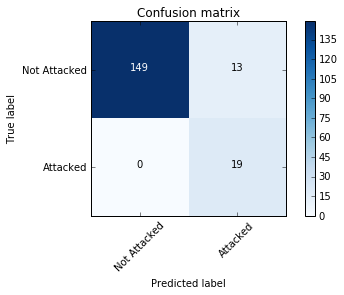

In [9]:
def plot_confusion_matrix(cm, class_labels, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_labels = ['Not Attacked', 'Attacked']

print 'Accuracy on test data:', accuracy_score(y_test, y_predict)

print 'Classification Report'
print classification_report(y_test, y_predict, target_names = class_labels)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, class_labels = class_labels, normalize=False, title='Confusion matrix')

plt.show()

In [20]:
# def dataPointClassify(id,model):
#     f = np.array([banks.get(id)[x] for x in bankpropertykeys]).astype(np.float)
#     f = f.reshape([1, f.size])
#     return model.predict(f)

def getProb(id, model):
    f = np.array([banks.get(id)[x] for x in bankpropertykeys]).astype(np.float)
    f = f.reshape([1, f.size])
    #print(f.shape)
    return model.predict_proba(f)

def show_most_informative_features(feature_names, clf, n=20):
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        prob_1 = math.pow(10, coef_1)
        prob_2 = math.pow(10, coef_2)
        print("\t%.4f\t\t%.2f\t%-15s" % (coef_2, prob_2, fn_2))

In [21]:
output = []
for key, value in banks.items():
    value['PROB_ATTACKED'] = getProb(key,clf)[0,1]
    output.append(value)

with open('results.csv', 'w') as csvfile:
    fieldnames = list(output[0].keys())
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for row in output:
        writer.writerow(row)

print(show_most_informative_features(bankpropertykeys,clf))

	-0.4678		0.34	Police_Dis     
	-1.0099		0.10	MWay_Dist      
	-5.8621		0.00	N_INCOME       
	-6.3765		0.00	N_UNP_RATE     
	-6.5414		0.00	N_DENSITY      
	-6.6055		0.00	N_COM_DENS     
	-6.6429		0.00	N_AGE          
	-7.2555		0.00	NUMBER         
None
